In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
df = pd.read_csv('TrainingSet.csv',sep = ';')
series = df['VALORE']

C:\Users\Mario\anaconda3\envs\gpu3.7\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mario\anaconda3\envs\gpu3.7\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Mario\anaconda3\envs\gpu3.7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Mario\anaconda3\envs\gpu3.7\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [7]:
def split_sequence_multi(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 21
n_steps_out = 1
n_features = 1
n = len(series)
winLen = int(n*.2)

In [8]:
MLRes = np.empty((24,61))
for hour in range(1,25):
    print(hour,end=' ')
    myts = df[df["Ora"] == hour]['VALORE']
    mean = np.mean(myts)
    std   = np.std(myts)
    series = (myts - mean)/std
    X, y = split_sequence_multi(series.to_numpy(), n_steps, n_steps_out)
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    model = keras.Sequential(
        [
            keras.layers.LSTM(200),
            keras.layers.Dense(100),
            keras.layers.Dense(n_steps_out)
        ]
    )

    model.compile(loss = 'mae',
             optimizer = keras.optimizers.Adam())

    model.fit(X, y, epochs=5, verbose=0)

    pred = list()


    data = np.array(series)
    pred_steps = int(np.floor(61 / n_steps_out)+2)
    for i in range(1,pred_steps):
        x_input = data[-n_steps:len(data)]
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)[0]
        pred.append(yhat)
        data = np.concatenate((data,yhat))

    predFin = np.array(pred).flatten()*std+mean
    MLRes[hour-1] = predFin[0:61]
    
print('')
finalPred2 = list()
for i in range(0,61):
    for j in range(0,24):
        finalPred2.append(MLRes[j][i])

1 2 3 4 5 6 7 

KeyboardInterrupt: 

In [ ]:
mypred1 = pd.read_csv('C://Users//Mario//Documents//SDMTSA_860571_1.csv', sep=';')
mypred1['ML'] = finalPred
mypred1.to_csv('SDMTSA_860571_1.csv',sep=';', index=False)

In [70]:
np.mean(MAEvals)

3165108.4290072345

In [9]:

model = keras.Sequential(
    [
        keras.layers.LSTM(200),
        keras.layers.Dense(100),
        keras.layers.Dense(1)
    ]
)


model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

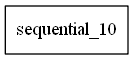

In [10]:
keras.utils.plot_model(model)